In [95]:
from empiricaldist import Pmf
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import pandas as pd

## Exercise 1

The following is an interview question that appeared on glassdoor.com, attributed to Facebook:

    You’re about to get on a plane to Seattle. You want to know if you should bring an umbrella. You call 3 random friends of yours who live there and ask each independently if it’s raining. Each of your friends has a 2/3 chance of telling you the truth and a 1/3 chance of messing with you by lying. All 3 friends tell you that “Yes” it is raining. What is the probability that it’s actually raining in Seattle?

Use Bayes’s Rule to solve this problem. As a prior you can assume that it rains in Seattle about 10% of the time.

In [17]:
def prob_to_odds(p):
    return p / (1-p)

def odds_to_prob(o):
    return o / (1+o)

prior_odds = prob_to_odds(0.1) # prior probability that it is raining
likelihood_ratio = 2/1 # likelihood ratio of rain given a response that it is raining
bayes_factor = likelihood_ratio**3 # bayes factor after 3 responses that it is raining
post_odds = prior_odds * bayes_factor

print(bayes_factor)
odds_to_prob(post_odds)


8.0


0.4705882352941177

# Exercise 2
According to the CDC, people who smoke are about 25 times more likely to develop lung cancer than nonsmokers.

Also according to the CDC, about 14% of adults in the U.S. are smokers. If you learn that someone has lung cancer, what is the probability they are a smoker?


In [21]:
prior_odds = prob_to_odds(0.14) # prior probability of being a smoker
likelihood_ratio = 25/1 # likelihood ratio of being a smoker given lung cancer
post_odds = prior_odds * likelihood_ratio
odds_to_prob(post_odds)

0.8027522935779816

# Excercise 3

There are 538 members of the United States Congress. Suppose we audit their investment portfolios and find that 312 of them out-perform the market. Let’s assume that an honest member of Congress has only a 50% chance of out-performing the market, but a dishonest member who trades on inside information has a 90% chance. How many members of Congress are honest?

In [86]:
def binomial(n, p):
    k = np.arange(n+1)
    probabilities = binom.pmf(k=k, n=n, p=p)
    return Pmf(probabilities, k)

n = 538

p_honest = 0.5
p_dishonest = 0.9

dists = []
for n_honest in range(n+1):
    n_dishonest = n - n_honest
    dist_honest = binomial(n_honest, p_honest)
    dist_dishonest = binomial(n_dishonest, p_dishonest)
    dists.append(Pmf.add_dist(dist_honest, dist_dishonest))

len(dists)

539

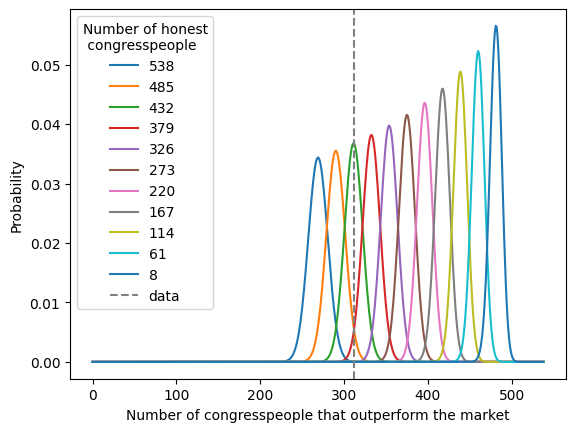

In [87]:
for i in range(len(dists)-1, 0, -(538//10)):
    dists[i].plot(label=i)

plt.ylabel('Probability')
plt.xlabel('Number of congresspeople that outperform the market')
plt.axline((312,0), (312,.05), color='gray', linestyle='--', label="data")
plt.legend(title='Number of honest\n congresspeople');

In [97]:
dist_df = pd.DataFrame(dists)
dist_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,529,530,531,532,533,534,535,536,537,538
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.058290e-15,9.258897e-16,1.255444e-16,1.486710e-17,1.506235e-18,1.269299e-19,8.541077e-21,4.302408e-22,1.442148e-23,2.412515e-25


In [106]:
hypos = np.arange(n+1)
prior = Pmf(1, hypos)
likelihood = dist_df.loc[:, 312]
posterior = prior * likelihood
posterior.normalize()
posterior.mean()

431.4882114501996